In [1]:
# Homework 01 

# Yash Kosambia 
# CWID 10475286



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [3]:
# Filter 


In [4]:
def imageFilter(kernel_size, sigma, ogImage):
    
    def convolution(paddedImage, kernel, ogImage):
        opRow, opCol = ogImage.shape
        outputImage = np.zeros((opRow, opCol))
        kernalSize = len(kernel)
    
        for i in range(opRow):
            for j in range(opCol):
                outputImage[i, j] = np.sum(kernel * paddedImage[i:i+kernalSize, j:j+kernalSize])
    
        return outputImage
    
    temp = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size) 
    gaussian_1d = list()
   
    for i in temp:
        gaussian_1d.append((1/(np.sqrt(2*np.pi) * sigma))* (np.e ** ((-np.square(i))/(2*np.square(sigma))))) #  1D Gaussian Kernel

    gaussian2d = np.outer(gaussian_1d, gaussian_1d) #  Gaussian 2D Kernel 
    kernel = gaussian2d/(np.sum(gaussian2d))

    padSize = len(kernel) // 2
    cv.imwrite("Original_Image.png", ogImage)
    paddedImage = np.pad(ogImage, padSize, 'edge')
    # cv.imwrite("Padded_image.png", paddedImage)
    gaussianOutput = convolution(paddedImage, kernel, ogImage)
    cv.imwrite("Gaussian_Output_Image.png", gaussianOutput)

    plt.imshow(gaussianOutput, cmap = 'gray')
    plt.title("Gaussian Filtered Image")
    plt.show()

    x_sobel_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    y_sobel_kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

    padSize_Sobel = len(x_sobel_kernel) // 2
    paddedImage_Sobel = np.pad(gaussianOutput, padSize_Sobel, 'edge')
    edgesXAxis = convolution(paddedImage_Sobel, x_sobel_kernel, ogImage)
    edgesYAxis = convolution(paddedImage_Sobel, y_sobel_kernel, ogImage) 
  
    gradient_Magnitude = np.sqrt(np.square(edgesXAxis) + np.square(edgesYAxis))
    gradient_Magnitude *= 255.0 / gradient_Magnitude.max()   # Threshold
    cv.imwrite("Gradient_Magnitude.png", gradient_Magnitude)   

    plt.imshow(gradient_Magnitude, cmap = 'gray')
    plt.title("Gradient Magnitude")
    plt.show()

    return gradient_Magnitude 

In [5]:
# Non Maximum Supression

In [6]:
def non_Maximum_Suppression (filteredImage):
    paddedImage = np.pad(filteredImage, 1, 'edge')
    angleRows, angleCols = paddedImage.shape
    angleMatrix = np.zeros_like(filteredImage)

    for i in range(angleRows - 2):
        for j in range(angleCols - 2):
            window = paddedImage[i:i+3, j:j+3]
            horizontalCheck = np.abs(window[1, 0] - window[1, 2]) 
            verticalCheck = np.abs(window[0, 1] - window[2, 1])
            diagonalLTopToRBtmCheck = np.abs(window[0, 0] - window[2, 2])
            diagonalLBtmToRTopCheck = np.abs(window[0, 2] - window[2, 0])

            if(verticalCheck > max(horizontalCheck, diagonalLBtmToRTopCheck, diagonalLTopToRBtmCheck)):
                angleMatrix[i, j] = 270 
            elif (horizontalCheck > max(verticalCheck, diagonalLBtmToRTopCheck, diagonalLTopToRBtmCheck)):
                angleMatrix[i, j] = 180 
            elif (diagonalLTopToRBtmCheck > max(horizontalCheck, verticalCheck, diagonalLBtmToRTopCheck)):
                angleMatrix[i, j] = 135 
            elif (diagonalLBtmToRTopCheck > max(horizontalCheck, verticalCheck, diagonalLTopToRBtmCheck)):
                angleMatrix[i, j] = 225 

    edgeMatrix = np.zeros_like(filteredImage)
    for i in range(angleRows - 2):
        for j in range(angleCols - 2):
            window = paddedImage[i:i+3, j:j+3]

            if(angleMatrix[i, j] == 270):
                if(window[1, 1] > max(window[0, 1], window[2, 1])):
                    edgeMatrix[i, j] = filteredImage[i, j]
            elif(angleMatrix[i, j] == 180):
                if(window[1, 1] > max(window[1, 0], window[1, 2])):
                    edgeMatrix[i, j] = filteredImage[i, j]
            elif(angleMatrix[i, j] == 135):
                if(window[1, 1] > max(window[0, 0], window[2, 2])):
                    edgeMatrix[i, j] = filteredImage[i ,j]
            elif(angleMatrix[i, j] == 225):
                if(window[1, 1] > max(window[0, 2], window[2, 0])):
                    edgeMatrix[i, j] = filteredImage[i, j]


    return edgeMatrix

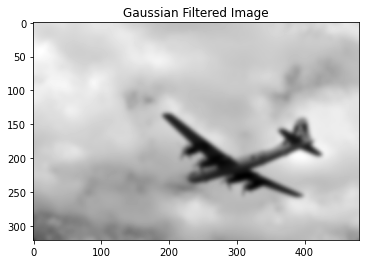

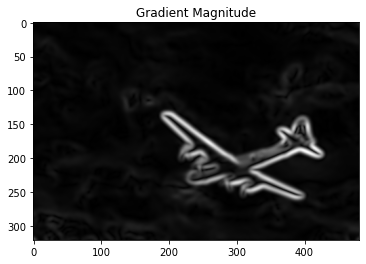

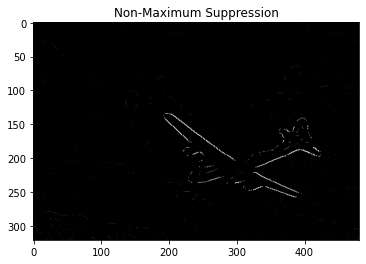

In [10]:
sigma = int(3)   # trying sigma = 1

filterSize = sigma * 10
if(filterSize % 2 == 0):
    filterSize -= 1

ogImage = cv.imread('plane.pgm')  # trying on Image plane.pgm
ogImage = cv.cvtColor(ogImage, cv.COLOR_BGR2GRAY)

filteredImage = imageFilter(filterSize, sigma, ogImage)

nmsImage = non_Maximum_Suppression(filteredImage)
cv.imwrite("NMS_Image.png", nmsImage)
plt.imshow(nmsImage, cmap = 'gray')
plt.title("Non-Maximum Suppression")
plt.show()

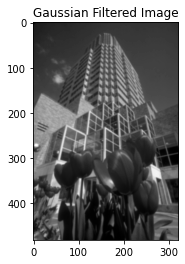

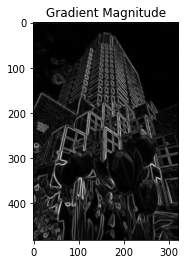

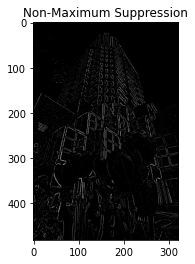

In [19]:
sigma = int(1)   # trying sigma = 2

filterSize = sigma * 6
if(filterSize % 2 == 0):
    filterSize -= 1

ogImage = cv.imread('red.pgm')  # trying on Image plane.pgm
ogImage = cv.cvtColor(ogImage, cv.COLOR_BGR2GRAY)

filteredImage = imageFilter(filterSize, sigma, ogImage)

nmsImage = non_Maximum_Suppression(filteredImage)
cv.imwrite("NMS_Image.png", nmsImage)
plt.imshow(nmsImage, cmap = 'gray')
plt.title("Non-Maximum Suppression")
plt.show()

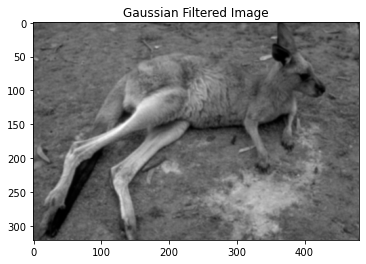

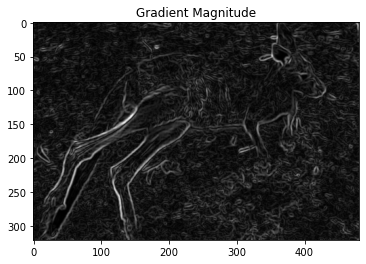

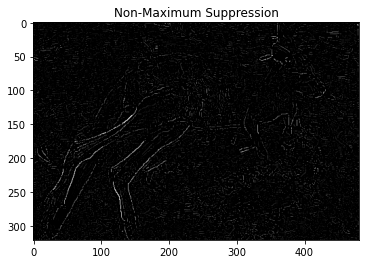

In [36]:
sigma = int(1)   # trying sigma = 2

filterSize = sigma * 9
if(filterSize % 2 == 0):
    filterSize -= 1

ogImage = cv.imread('kangaroo.pgm')  # trying on Image plane.pgm
ogImage = cv.cvtColor(ogImage, cv.COLOR_BGR2GRAY)

filteredImage = imageFilter(filterSize, sigma, ogImage)

nmsImage = non_Maximum_Suppression(filteredImage)
cv.imwrite("NMS_Image.png", nmsImage)
plt.imshow(nmsImage, cmap = 'gray')
plt.title("Non-Maximum Suppression")
plt.show()